In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
GOOGLE_COLAB = True

In [0]:
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.2.0-rc2


In [0]:
import sys
if GOOGLE_COLAB:
    sys.path.append('drive/My Drive/yelp_sentiment_analysis')
else:
    sys.path.append('../')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization
from yelpsent import models

In [0]:
import importlib
def reload():
  importlib.reload(data)
  importlib.reload(features)
  importlib.reload(metrics)
  importlib.reload(visualization)
  importlib.reload(models)

# Load Dataset

In [0]:
if GOOGLE_COLAB:
    data_train, data_test = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train_balanced.json",
                                              "drive/My Drive/yelp_sentiment_analysis/data/yelp_test.json")
    data_train_clean, data_test_clean = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train_clean_nolemma.json",
                                                          "drive/My Drive/yelp_sentiment_analysis/data/yelp_test_clean_nolemma.json")
else:
    data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                              "../data/yelp_test.json")

In [0]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()
X_train_clean = data_train_clean['review'].tolist()

In [0]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()
X_test_clean = data_test_clean['review'].tolist()

In [11]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
y_train_one_hot = to_categorical(y_train, num_classes=3)

In [13]:
y_train_one_hot.shape

(135000, 3)

In [0]:
y_test_one_hot = to_categorical(y_test, num_classes=3)

In [15]:
y_test_one_hot.shape

(90639, 3)

# Clean Reviews

In [0]:
import re
import string
import nltk
from nltk import WordNetLemmatizer, sent_tokenize, wordpunct_tokenize, pos_tag
from nltk.corpus import wordnet

In [0]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
punct = set(string.punctuation)
# lemmatizer = WordNetLemmatizer()

In [0]:
# def lemmatize(token, tag):
#     tag = {
#         'N': wordnet.NOUN,
#         'V': wordnet.VERB,
#         'R': wordnet.ADV,
#         'J': wordnet.ADJ
#     }.get(tag[0], wordnet.NOUN)
#     return lemmatizer.lemmatize(token, tag)

In [0]:
# def clean_doc(doc):
#     cleaned_tokens = []
#     # Break the document into sentences
#     for sent in sent_tokenize(doc):
#         # Break the sentence into part of speech tagged tokens
#         for token, tag in pos_tag(wordpunct_tokenize(sent)):
#             # Lower case and strip spaces
#             token = token.lower()
#             token = token.strip()
#             # If punctuation, continue
#             if all(char in punct for char in token):
#                 continue
#             # Lemmatize/stem the token
#             token = lemmatize(token, tag)
#             cleaned_tokens.append(token)
#     return ' '.join(cleaned_tokens)

In [0]:
def clean_doc(doc):
    cleaned_tokens = []
    # Break the document into sentences
    for sent in sent_tokenize(doc):
        # Break the sentence into part of speech tagged tokens
        for token in wordpunct_tokenize(sent):
            # Lower case and strip spaces
            token = token.lower()
            token = token.strip()
            # If punctuation, continue
            if all(char in punct for char in token):
                continue
            # Add back token
            cleaned_tokens.append(token)
    return ' '.join(cleaned_tokens)

In [0]:
X_train_clean = [clean_doc(doc) for doc in X_train]
X_test_clean = [clean_doc(doc) for doc in X_test]

In [0]:
data_train_clean = pd.DataFrame({'review':X_train_clean, 'sentiment':y_train})
data_train_test = pd.DataFrame({'review':X_test_clean, 'sentiment':y_test})
data_train_clean.to_json('drive/My Drive/yelp_sentiment_analysis/data/yelp_train_clean_nolemma.json', orient='records')
data_train_test.to_json('drive/My Drive/yelp_sentiment_analysis/data/yelp_test_clean_nolemma.json', orient='records')

In [0]:
# data_train_clean = pd.DataFrame({'review':X_train_clean, 'sentiment':y_train})
# data_train_test = pd.DataFrame({'review':X_test_clean, 'sentiment':y_test})

In [0]:
# data_train_clean.to_json('drive/My Drive/yelp_sentiment_analysis/data/yelp_train_clean.json', orient='records')
# data_train_test.to_json('drive/My Drive/yelp_sentiment_analysis/data/yelp_test_clean.json', orient='records')

In [0]:
import os
import urllib.request

In [0]:
urllib.request.urlretrieve('http://nlp.stanford.edu/data/glove.6B.zip', 'glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7fe6960c09b0>)

In [43]:
urllib.request.urlretrieve('https://www.floydhub.com/mhavelant/datasets/glove6b/1/glove.6B.200d.txt', 'glove.6B.200d.txt')

HTTPError: ignored

In [0]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
urllib.request.urlretrieve('http://nlp.stanford.edu/data/glove.twitter.27B.zip', 'glove.twitter.27B.zip')

('glove.twitter.27B.zip', <http.client.HTTPMessage at 0x7fb0ebd6ef60>)

In [0]:
!unzip glove.twitter.27B.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


# Tokenize

In [0]:
# vocab_size = 5000

In [0]:
tokenizer = Tokenizer()
# tokenizer = Tokenizer(num_words=vocab_size,
#                       oov_token=True)

In [45]:
%time tokenizer.fit_on_texts(X_train_clean)

CPU times: user 12.3 s, sys: 13.4 ms, total: 12.4 s
Wall time: 12.4 s


In [0]:
word_index = tokenizer.word_index

In [47]:
len(word_index)

81907

In [0]:
max_length = 200

In [0]:
X_train_sequences = tokenizer.texts_to_sequences(X_train_clean)

X_train_padded = pad_sequences(X_train_sequences,
                               maxlen=max_length,
                               padding='post',
                               truncating='post')

In [0]:
X_test_sequences = tokenizer.texts_to_sequences(X_test_clean)

X_test_padded = pad_sequences(X_test_sequences,
                              maxlen=max_length,
                              padding='post',
                              truncating='post')

In [51]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print('---')
print(X_train[1])
print('---')
print(X_train_clean[1])
print('---')
print((X_train_padded[1]))
print('---')
print(decode_article(X_train_padded[1]))

---
There was nothing good to say. There I said it . Wait the waitress and owners were nice. But thats it. 

I have eaten here a few times, its expensive for what you get , the quality of food is very low ,  bacon and sausages sit in a grill pan till they are warmed up on the grill when you order them . Bacon is thin and Hollandaise sauce is for sure from a package. 

I really did try to give it a chance, but its a no go for me. I enjoy the eggs benny with Prosciutto from Il Gusto next door, they have a huge patio and fantastic menu options.
---
there was nothing good to say there i said it wait the waitress and owners were nice but thats it i have eaten here a few times its expensive for what you get the quality of food is very low bacon and sausages sit in a grill pan till they are warmed up on the grill when you order them bacon is thin and hollandaise sauce is for sure from a package i really did try to give it a chance but its a no go for me i enjoy the eggs benny with prosciutto 

Pre-Trained GloVe Embedding (https://nlp.stanford.edu/projects/glove/)



In [0]:
embeddings_index = dict()

with open('glove.6B.200d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

In [0]:
embeddings_matrix = np.zeros((len(word_index), max_length))

for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # print(embedding_vector.shape)
    embeddings_matrix[i-1] = embedding_vector

# Model

In [55]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.26.177.90:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.26.177.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.26.177.90:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [56]:
print((X_train_padded.shape, y_train_one_hot.shape, X_test_padded.shape, y_test_one_hot.shape))

((135000, 200), (135000, 3), (90639, 200), (90639, 3))


In [85]:
with tpu_strategy.scope():
  model = tf.keras.Sequential([
      # GloVe embedding
      tf.keras.layers.Embedding(input_dim=len(word_index),
                                output_dim=max_length,
                                input_length=max_length,
                                weights=[embeddings_matrix],
                                trainable=False),
      # Bidirectional LSTM
      # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128,
      #                                                    dropout=0.3,
      #                                                    recurrent_dropout=0.3)),
      tf.keras.layers.LSTM(units=64, return_sequences=True, recurrent_dropout=0.5),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.LSTM(units=64, recurrent_dropout=0.5),
      # ReLU
      tf.keras.layers.Dense(64, activation='relu'),
      # SoftMax output
      tf.keras.layers.Dense(3, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,
                                                   decay=0.001),
                metrics=['accuracy'])
  
  es = EarlyStopping(monitor='val_loss',
                     mode='min',
                     verbose=1,
                     patience=2)
  
  model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 200)          16381400  
_________________________________________________________________
lstm_6 (LSTM)                (None, 200, 64)           67840     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 64)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 16,486,619
Trainable params: 105,219
Non-trainable params: 16,381,400
____________________________________

In [86]:
history = model.fit(X_train_padded,
                    y_train_one_hot,
                    epochs=30,
                    # validation_data=(X_test_padded, y_test_one_hot),
                    validation_split=0.2,
                    verbose=2,
                    callbacks=[es])

Epoch 1/30
3375/3375 - 94s - accuracy: 0.4188 - loss: 1.0274 - val_accuracy: 0.0000e+00 - val_loss: 1.8019
Epoch 2/30
3375/3375 - 96s - accuracy: 0.4778 - loss: 0.9889 - val_accuracy: 0.0356 - val_loss: 1.7152
Epoch 3/30
3375/3375 - 95s - accuracy: 0.6291 - loss: 0.7918 - val_accuracy: 0.3328 - val_loss: 1.4045
Epoch 4/30
3375/3375 - 95s - accuracy: 0.6816 - loss: 0.7000 - val_accuracy: 0.6280 - val_loss: 0.7815
Epoch 5/30
3375/3375 - 95s - accuracy: 0.7056 - loss: 0.6561 - val_accuracy: 0.6373 - val_loss: 0.7713
Epoch 6/30
3375/3375 - 96s - accuracy: 0.7207 - loss: 0.6286 - val_accuracy: 0.5952 - val_loss: 0.8617
Epoch 7/30
3375/3375 - 95s - accuracy: 0.7302 - loss: 0.6083 - val_accuracy: 0.6297 - val_loss: 0.7676
Epoch 8/30
3375/3375 - 95s - accuracy: 0.7389 - loss: 0.5932 - val_accuracy: 0.6584 - val_loss: 0.7185
Epoch 9/30
3375/3375 - 95s - accuracy: 0.7439 - loss: 0.5823 - val_accuracy: 0.7148 - val_loss: 0.6436
Epoch 10/30
3375/3375 - 95s - accuracy: 0.7486 - loss: 0.5723 - val_a

In [87]:
accr = model.evaluate(X_test_padded, y_test_one_hot)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2833/2833 [==============================] - 46s 16ms/step - accuracy: 0.6813 - loss: 0.6999
Test set
  Loss: 0.700
  Accuracy: 0.681


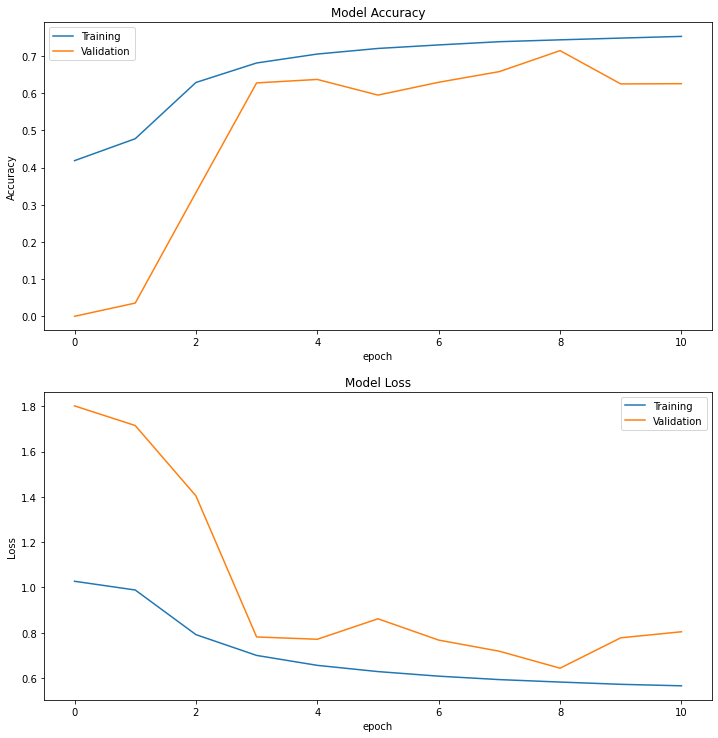

In [97]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('Model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['Training', 'Validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'Loss', 212)

In [0]:
labels = [0,1,2]

# txt = [X_test_clean[0]]
# seq = tokenizer.texts_to_sequences(txt)
# padded = pad_sequences(seq, maxlen=max_length)
# pred = model.predict(padded)[:len(txt)]
# print(pred, labels[np.argmax(pred)])

In [90]:
%time y_train_prob = model.predict(X_train_padded)[:len(X_train_padded)]

CPU times: user 2.81 s, sys: 607 ms, total: 3.42 s
Wall time: 49.2 s


In [91]:
%time y_test_prob = model.predict(X_test_padded)[:len(X_test_padded)]

CPU times: user 2.25 s, sys: 417 ms, total: 2.66 s
Wall time: 33.5 s


In [92]:
%time y_train_pred = [labels[np.argmax(pred)] for pred in y_train_prob]

CPU times: user 310 ms, sys: 9.47 ms, total: 320 ms
Wall time: 262 ms


In [93]:
%time y_test_pred = [labels[np.argmax(pred)] for pred in y_test_prob]

CPU times: user 175 ms, sys: 0 ns, total: 175 ms
Wall time: 174 ms


In [0]:
import sklearn

In [95]:
sklearn.metrics.f1_score(y_test, y_test_pred, average='macro')

0.6671755628607707

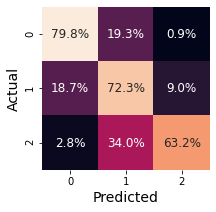

Macro F1 Scores: 
 Training: 0.754 
 Testing: 0.701




In [96]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

f1_train, f1_test = metrics.f1_score(y_train, y_train_pred), metrics.f1_score(y_test, y_test_pred)

print("Macro F1 Scores: \n Training: {0:.3f} \n Testing: {1:.3f}\n\n".format(f1_train, f1_test))

In [0]:
 from keras.models import load_model

In [0]:
model.save('drive/My Drive/yelp_sentiment_analysis/models/lstm_64units_10epochs.h5')

# model = load_model('drive/My Drive/yelp_sentiment_analysis/models/lstm.h5')